In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('diabetes_feature.csv')
df.shape

(768, 16)

## 학습과 예측에 사용할 데이터셋 만들기

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [10]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [11]:
y=df['Outcome']
y.shape

(768,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(614, 9)

In [14]:
y_train.shape

(614,)

In [15]:
X_test.shape, y_test.shape

((154, 9), (154,))

### Single Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(max_depth=3, random_state=42)
# model

### Bagging

In [17]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)

### Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

## 학습과 예측하기

In [46]:
#학습 시킨다 - 정답(y_train)넣어준다
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

In [48]:
feature_names = X_train.columns.tolist()

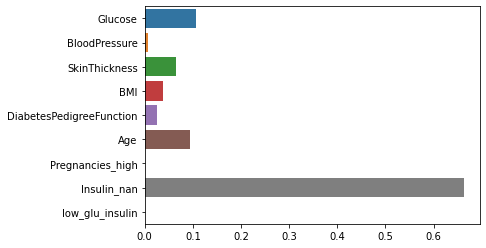

In [49]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [50]:
#예측을 하고(예측할 때는 정답 넣어주지 않는다) 결과를 y_predict에 담는다
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

## 정확도 측정하기

In [51]:
#DeicisionTree : 28
#randomForest : 21
#GB : 24

diff_count = abs(y_predict - y_test).sum()
diff_count

24

In [52]:
#혹은 이 방법도 가능
#(y_predict != y_test).sum()

In [53]:
# DT : 81.8
# RF : 86.36
# GBL : 84.4

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

84.4155844155844